<a href="https://colab.research.google.com/github/ilman79/Chapter2-Binary/blob/main/Challenge_ChapterII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Deskripsi Data

Pada dataset kali ini, dataset yang digunakan adalah dataset pelanggan yang gunakan provider kami. didalamnya terdapat beberapa kolumn data yang disajikan sebagai berikut,

- state ( Negara)                           
- account_length (berapa lama akun pelanggan digunakan)                  
- area_code (kode wilayah)                      
- international_plan (apakah pelanggan memiliki atau tidak memiliki paket rencana internasional)              
- voice_mail_plan(apakah pelanggan memiliki atau tidak memiliki paket rencana voicemail)                 
- number_vmail_messages(jumlah pesan voicemail yang diterima oleh pelanggan)          
- total_day_minutes(total menit yang dihabiskan pelanggan untuk panggilan pada periode hari)             
- total_day_calls(total panggilan yang dilakukan oleh pelanggan pada periode hari)                 
- total_day_charge (total biaya yang dikenakan kepada pelanggan untuk penggunaan layanan pada periode hari)               
- total_eve_minutes( total menit yang dihabiskan pelanggan untuk panggilan pada tiap hari)              
- total_eve_calls(total panggilan yang dilakukan oleh pelanggan setiap hari)                 
- total_eve_charge(biaya yang dikenakan kepada pelanggan untuk panggilan, pesan teks, atau penggunaan layanan lainnya yang dilakukan setiap hari)               
- total_night_minutes(total menit panggilan yang dilakukan oleh pelanggan pada jam-jam malam hari)            
- total_night_calls(jumlah panggilan yang dilakukan oleh pelanggan pada jam-jam malam hari)              
- total_night_charge (dapat mencerminkan biaya yang dikenakan kepada pelanggan untuk panggilan, pesan teks, atau penggunaan layanan lainnya yang dilakukan pada periode malam hari)             
- total_intl_minutes (total durasi waktu (dalam menit) yang dihabiskan oleh pelanggan untuk melakukan panggilan ke tujuan internasional)             
- total_intl_calls (jumlah total panggilan internasional)                 
- total_intl_charge (biaya panggilan untuk internasional)              
- number_customer_service_calls    
- churn (berhenti/ berpindah)                           

#1. Import Library & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

##Data Train

In [2]:
url = "https://raw.githubusercontent.com/ilman79/Chapter2-Binary/main/Data%20Train.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
df.shape

(4250, 20)

terdapat 20 kolom dan 4250 baris pada data yang kita gunakan

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Ada beberapa yang harus kita ubah pada tipe datanya yaitu 'churn' menjadi number menjadi 1 dan 0, dimana yes diubah menjadi 1 dan no diubah menjadi 0. begitu juga dengan 'international_plan', 'voice_mail_plan' dan sisanya sudah sesuai

In [6]:
catregoriz = ['churn','international_plan','voice_mail_plan']

def categorize_churn(value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0
    else:
        return 'NaN'  # Menggunakan float('nan') untuk menghasilkan nilai NaN yang valid

# Menggunakan fungsi apply pada setiap kolom yang ingin diubah
for col in catregoriz:
    df[col] = df[col].apply(categorize_churn)

mengantisipasi jika ada missing value tidak kita isikan dengan 0 tetapi dengan NaN

In [7]:
df[['churn','international_plan','voice_mail_plan']]

,churn,international_plan,voice_mail_plan
0,0,0,1
1,0,0,0
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
4245,0,0,0
4246,0,0,0
4247,0,0,0
4248,0,0,1


##Data Test

In [19]:
url2 = "https://raw.githubusercontent.com/ilman79/Chapter2-Binary/main/Data%20Test.csv"
df2 = pd.read_csv(url2)

In [26]:
df2.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [25]:
df2.shape

(750, 20)

Terdapat 750 baris data dan 20 kolumn untuk data test yang akan digunakan

In [23]:
catregoriz2 = ['international_plan','voice_mail_plan']

def categorize_churn2(value):
    if value == 'yes':
        return 1
    elif value == 'no':
        return 0
    else:
        return 'NaN'  # Menggunakan float('nan') untuk menghasilkan nilai NaN yang valid

# Menggunakan fungsi apply pada setiap kolom yang ingin diubah
for col in catregoriz2:
    df2[col] = df2[col].apply(categorize_churn2)

In [24]:
df[['international_plan','voice_mail_plan']]

,international_plan,voice_mail_plan
0,0,1
1,0,0
2,1,0
3,1,0
4,0,1
...,...,...
4245,0,0
4246,0,0
4247,0,0
4248,0,1


# 2. Exploratory Data Analysis (EDA)

##Data Train

In [8]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,state,area_code
0,OH,area_code_415
1,NJ,area_code_415
2,OH,area_code_408
3,OK,area_code_415
4,MA,area_code_510


In [9]:
df.state.value_counts()

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

pelanggan terbanyak dari negara WV

In [10]:
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,0.290714,0.439583,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Ada beberapa data yang perlu diperhatikan yaitu total_day_minutes

0    85.929412
1    14.070588
Name: churn, dtype: float64


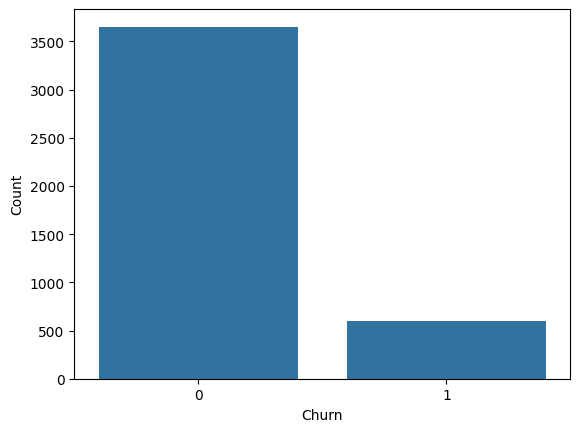

In [11]:
# Membuat diagram batang menggunakan Seaborn
sns.countplot(x='churn', data=df)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Churn')
plt.ylabel('Count')

# Menampilkan plot
print(df.churn.value_counts()/len(df)*100)
plt.show()

Dari hasil grafik diatas, terlihat bahwa 85,9% memutuskan tidak berpindah atau tetap pada prodiver yang sama dan 14,1% memutuskan untuk berpindah ke provider lain.

<Axes: ylabel='total_day_minutes'>

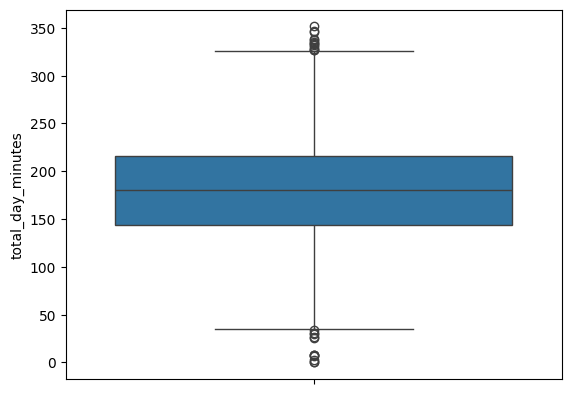

In [12]:
sns.boxplot(y= df.total_day_minutes)

#3. Data Preprocessing

##Data Train

### 3.1 Mengecek Duplikasi data

In [15]:
df.duplicated().sum()

0

Tidak ada data yang sama atau duplikat sehingga data sudah aman dari data yang sama.

### 3.2 Cek Missing Value

In [16]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Tidak ada data yang kosong sehingga aman untuk digunakan.

##**Data Test**

###3.1 Mengecek Duplikasi Data

In [27]:
df2.duplicated().sum()

0

Tidak ada data yang sama atau duplikat sehingga data sudah aman dari data yang sama.

##3.2 Mengecek Missing Value

In [28]:
df2.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Tidak ada data yang kosong sehingga aman untuk digunakan.

#4. Machine Learning Algorithm

In [17]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB